# Data Preprocessing

## Download & export data tables

### Download Microsoft OHLCV with `yfinance` library

**Search for the ticker code**

YFinance: https://finance.yahoo.com/

- [ ] Microsoft: ???

In [95]:
import yfinance as yf

In [96]:
df_MSFT = yf.download(tickers='MSFT')
df_MSFT.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060274,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062427,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063504,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061889,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060812,47894400


### Download any ticker

- [x] Microsoft: MSFT
- [ ] Bitcoin: ???

In [97]:
ticker = 'BTC-USD'
df_BTC = yf.download(ticker)
df_BTC

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-12-16,41937.742188,42664.945312,41723.113281,42240.117188,42240.117188,14386729590
2023-12-17,42236.109375,42359.496094,41274.542969,41364.664062,41364.664062,16678702876
2023-12-18,41348.203125,42720.296875,40530.257812,42623.539062,42623.539062,25224642008


## Visualize the data with plotly

https://plotly.com/python/candlestick-charts/

In [98]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['AAPL.Open'],
                high=df['AAPL.High'],
                low=df['AAPL.Low'],
                close=df['AAPL.Close'])])

fig.show()

In [99]:
df = df_MSFT

fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

In [100]:
df = df_BTC

go.Figure(data=[go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'])])

## Export the data

### Microsoft data

#### Drop `Adj Close`

- To not confuse the `Close` and `Adj Close`

In [101]:
df_MSFT = df_MSFT.drop(columns='Adj Close')

#### To Excel

- Create a folder called `data`

In [102]:
df_MSFT.to_excel('MSFT.xlsx')

#### To CSV

- Less size in memory

In [103]:
df_MSFT.to_csv('MSFT.csv')

### Bitcoin data altogether (step by step)

#### Define ticker

In [104]:
ticker = 'BTC-USD'
ticker

'BTC-USD'

#### Download OLHVC

In [105]:
df_ticker = yf.download(ticker)
df_ticker

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-12-16,41937.742188,42664.945312,41723.113281,42240.117188,42240.117188,14386729590
2023-12-17,42236.109375,42359.496094,41274.542969,41364.664062,41364.664062,16678702876
2023-12-18,41348.203125,42720.296875,40530.257812,42623.539062,42623.539062,25224642008


#### Create file path

In [106]:
file_path = f'data/{ticker}.xlsx'
file_path

'data/BTC-USD.xlsx'

#### Export to Excel

In [107]:
df_ticker.to_excel(file_path)

#### Export to CSV

In [108]:
df_ticker.to_csv(f'data/{ticker}.csv')

#### Snippet

In [109]:
ticker = 'TSLA'
df_ticker = yf.download(ticker)
df_ticker.to_excel(f'data/{ticker}.xlsx')
df_ticker.to_csv(f'data/{ticker}.csv')

[*********************100%%**********************]  1 of 1 completed


## [ ] Data Preprocessing

### Load the data

In [110]:
import pandas as pd

df_microsoft = pd.read_excel(
    'data/Microsoft_Stock_Price_Historical_Daily.xlsx',
    parse_dates=['Date'], index_col=0
)

df_microsoft

,Open,High,Low,Close,Volume
Date,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,47894400
...,...,...,...,...,...
2023-05-22,318.600006,322.589996,318.010010,321.179993,24115700
2023-05-23,320.029999,322.720001,315.250000,315.260010,30797200
2023-05-24,314.730011,316.500000,312.609985,313.850006,23384900


### Filter the data

![](src/Microsoft_x_LinkedIn.png)

## Create new columns

### Tomorrow's percentage change

In [111]:
df_microsoft_linkedin = df_microsoft.loc['2016-12-08':,:].copy()

In [112]:
df_microsoft_linkedin['change_tomorrow'] = df_microsoft_linkedin.Close.pct_change(-1) * 100 * -1

In [113]:
df_microsoft_linkedin = df_microsoft_linkedin.dropna()

### Did the stock go up or down?

In [114]:
import numpy as np

In [115]:
df_microsoft_linkedin['change_tomorrow_direction'] = np.where(df_microsoft_linkedin.change_tomorrow > 0, 'UP', 'DOWN')

In [116]:
df_microsoft_linkedin.tail()

,Open,High,Low,Close,Volume,change_tomorrow,change_tomorrow_direction
Date,,,,,,,
2023-05-19,316.739990,318.750000,316.369995,318.339996,27529500,0.884238,UP
2023-05-22,318.600006,322.589996,318.010010,321.179993,24115700,-1.877810,DOWN
2023-05-23,320.029999,322.720001,315.250000,315.260010,30797200,-0.449260,DOWN
2023-05-24,314.730011,316.500000,312.609985,313.850006,23384900,3.703365,UP
2023-05-25,323.239990,326.899994,320.000000,325.920013,43301700,2.093785,UP


In [117]:
df_microsoft_linkedin.value_counts('change_tomorrow_direction')

change_tomorrow_direction
UP      869
DOWN    757
Name: count, dtype: int64

<Axes: xlabel='Date'>

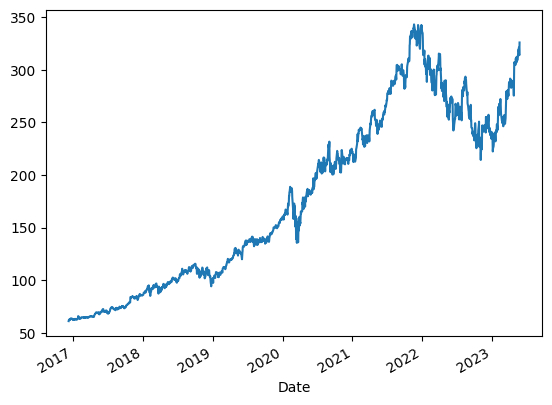

In [118]:
df_microsoft_linkedin.Close.plot()

## Export preprocessed DataFrame into an Excel

In [119]:
df_microsoft_linkedin.to_excel('data/Microsoft_LinkedIn_Pricessed.xlsx')

In [120]:
df_microsoft_linkedin.to_csv('data/Microsoft_LinkedIn_Pricessed.csv')